<a href="https://colab.research.google.com/github/MaspRj/Data-Analyst/blob/main/An%C3%A1lise%20de%20domic%C3%ADlios%20no%20Brasil%20em%202015%20-%20IBGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Dados do número de domicílios no ano de 2015 no Brasil - Fundamentos da Matemática **
## **DESAFÍO**

#### Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st

Importando os dados a serem utilizados (Dataframe = domicilios)

In [2]:
!wget -q "https://raw.githubusercontent.com/rafands/ebac-course-content/main/dados_IBGE_domicilios_2015.csv" -O dados_IBGE_domicilios_2015.csv

domicilios = pd.read_csv('./dados_IBGE_domicilios_2015.csv', sep=';')

domicilios.dropna(inplace=True)

domicilios.head()

,Ano de referência,Unidade da Federação,Número de controle,Número de série,Tipo de entrevista,Total de moradores,Total de moradores de 10 anos ou mais,Tipo do domicílio,Número de cômodos do domicílio,Número de cômodos servindo de dormitório,Condição de ocupação do domicílio,Aluguel mensal pago no mês de referência,Prestação mensal paga no mês de referência,Tem acesso à Internet no próprio domicilio,Tem carro ou motocicleta de uso pessoal,Rendimento mensal domiciliar,Número de componentes do domícilio,Rendimento mensal domiciliar per capita
0,2015,Rondônia,11000058,8,Realizada,4,3,Casa,5,2,Alugado,650,0,2,4,3350,4,837
1,2015,Rondônia,11000163,1,Realizada,3,1,Casa,6,2,Próprio – já pago,0,0,4,4,1734,3,578
2,2015,Rondônia,11000210,19,Realizada,2,2,Casa,4,2,Próprio – já pago,0,0,4,4,1576,2,788
3,2015,Rondônia,11000341,15,Realizada,5,5,Casa,4,2,Próprio – já pago,0,0,4,2,3427,5,685
4,2015,Rondônia,11000422,6,Realizada,3,2,Casa,5,2,Próprio – já pago,0,0,4,4,900,3,300


1) Mostre as propriedades deste dataframe:
- Lista de colunas
- Quantidade de linhas e colunas (shape)
- Tipo de dados de cada coluna

(não se esqueça de imprimir, print(), cada uma dessas informações)

In [3]:
# Resposta 1:
# Exibir as colunas.
print(list(domicilios.columns))
print('----------------------')
# Exibir quantidades de linhas e colunas.
print(domicilios.shape)
print('----------------------')
# Exibir os tipos de dados de cada coluna.
print(domicilios.dtypes)

['Ano de referência', 'Unidade da Federação', 'Número de controle', 'Número de série', 'Tipo de entrevista', 'Total de moradores', 'Total de moradores de 10 anos ou mais', 'Tipo do domicílio', 'Número de cômodos do domicílio', 'Número de cômodos servindo de dormitório', 'Condição de ocupação do domicílio', 'Aluguel mensal pago no mês de referência', 'Prestação mensal paga no mês de referência', 'Tem acesso à Internet no próprio domicilio', 'Tem carro ou motocicleta de uso pessoal', 'Rendimento mensal domiciliar', 'Número de componentes do domícilio', 'Rendimento mensal domiciliar per capita']
----------------------
(11710, 18)
----------------------
Ano de referência                              int64
Unidade da Federação                          object
Número de controle                             int64
Número de série                                int64
Tipo de entrevista                            object
Total de moradores                             int64
Total de moradores de 10

2) Altere os nomes das colunas do dataframe a seguir:

- 'Ano de referência' por 'ano_ref'
- 'Unidade da Federação' por 'uf'
- 'Número de controle' por 'num_cont'
- 'Número de série' por 'num_ser'
- 'Tipo de entrevista' por 'tipo_ent'
- 'Total de moradores' por 'num_moradores'
- 'Total de moradores de 10 anos ou mais' por 'num_moradores_maiores_10anos'
- 'Tipo do domicílio' por 'tipo_domicilio'
- 'Número de cômodos do domicílio' por 'num_comodos'
- 'Número de cômodos servindo de dormitório' por 'num_dormitorios'
- 'Condição de ocupação do domicílio' por 'condicao_domicilio'
- 'Aluguel mensal pago no mês de referência' por 'vlr_aluguel_mensal'
- 'Prestação mensal paga no mês de referência' por 'prestacao_mensal'
- 'Tem acesso à Internet no próprio domicilio' por 'tem_acesso_internet'
- 'Tem carro ou motocicleta de uso pessoal' por 'tem_veiculo'
- 'Rendimento mensal domiciliar' por 'renda_mensal_domicilio'
- 'Número de componentes do domícilio' por 'num_componentes'
- 'Rendimento mensal domiciliar per capita' por 'renda_mensal_percapita'

In [5]:
# Resposta 2:
# Renomear as colunas.
# Exibir o tipo de dados.
domicilios.rename(columns={
    'Ano de referência':'ano_ref',
    'Unidade da Federação':'uf',
    'Número de controle':'num_cont',
    'Número de série':'num_ser',
    'Tipo de entrevista':'tipo_ent',
    'Total de moradores':'num_moradores',
    'Total de moradores de 10 anos ou mais':'num_moradores_maiores_10anos',
    'Tipo do domicílio':'tipo_domicilio',
    'Número de cômodos do domicílio':'num_comodos',
    'Número de cômodos servindo de dormitório':'num_dormitorios',
    'Condição de ocupação do domicílio':'condicao_domicilio',
    'Aluguel mensal pago no mês de referência':'vlr_aluguel_mensal',
    'Prestação mensal paga no mês de referência':'prestacao_mensal',
    'Tem acesso à Internet no próprio domicilio':'tem_acesso_internet',
    'Tem carro ou motocicleta de uso pessoal':'tem_veiculo',
    'Rendimento mensal domiciliar':'renda_mensal_domicilio',
    'Número de componentes do domícilio':'num_componentes',
    'Rendimento mensal domiciliar per capita':'renda_mensal_percapita'
}, inplace=True)

domicilios.dtypes

,0
ano_ref,int64
uf,object
num_cont,int64
num_ser,int64
tipo_ent,object
num_moradores,int64
num_moradores_maiores_10anos,int64
tipo_domicilio,object
num_comodos,int64
num_dormitorios,int64


3) Crie um dataframe de nome df mantendo apenas as colunas:

- 'ano_ref'
- 'uf'
- 'num_moradores'
- 'num_moradores_maiores_10anos'
- 'tipo_domicilio'
- 'num_comodos'
- 'num_dormitorios'
- 'condicao_domicilio'
- 'vlr_aluguel_mensal'
- 'prestacao_mensal'
- 'renda_mensal_domicilio'


In [6]:
# Resposta 3:
# Criar o dataframe.
df = domicilios[['ano_ref','uf','num_moradores',
                 'num_moradores_maiores_10anos',
                 'tipo_domicilio','num_comodos',
                 'num_dormitorios','condicao_domicilio',
                 'vlr_aluguel_mensal','prestacao_mensal',
                 'renda_mensal_domicilio']]

df.head()

,ano_ref,uf,num_moradores,num_moradores_maiores_10anos,tipo_domicilio,num_comodos,num_dormitorios,condicao_domicilio,vlr_aluguel_mensal,prestacao_mensal,renda_mensal_domicilio
0,2015,Rondônia,4,3,Casa,5,2,Alugado,650,0,3350
1,2015,Rondônia,3,1,Casa,6,2,Próprio – já pago,0,0,1734
2,2015,Rondônia,2,2,Casa,4,2,Próprio – já pago,0,0,1576
3,2015,Rondônia,5,5,Casa,4,2,Próprio – já pago,0,0,3427
4,2015,Rondônia,3,2,Casa,5,2,Próprio – já pago,0,0,900


4) Descubra **a média e o desvio padrã**o do número de moradores (num_moradores) por domicílio:

In [7]:
# Resposta 4:

df['num_moradores'].agg(['mean','std'])

,num_moradores
mean,3.020666
std,1.523158


5) Descubra **a média do número de moradores** (num_moradores) por tipo de domicilio (tipo_domicilio):

In [8]:
# Resposta 5:

df[['tipo_domicilio','num_moradores']].groupby('tipo_domicilio').agg('mean')

,num_moradores
tipo_domicilio,
Apartamento,2.465632
Casa,3.096092
Cômodo,2.409091


6) Quantos casos existem para cada Condição de ocupação do domicílio (condicao_domicilio)

In [9]:
# Resposta 6:
# Agrupar pela condição de ocupação.
df.groupby('condicao_domicilio').size()

,0
condicao_domicilio,
Alugado,2078
Cedido de outra forma,572
Cedido por empregador,214
Outra condição,40
Próprio – ainda pagando,559
Próprio – já pago,8247


7) Qual é **a média e o desvio padrão do valor de aluguel mensal** (vlr_aluguel_mensal)?

(não se esqueça que nem todos moram de aluguel, precisamos filtrar os outros casos desta análise)

In [10]:
# Resposta 7:

df[df['condicao_domicilio']=='Alugado'][['vlr_aluguel_mensal']].agg(['mean','std','max']).round(2)

,vlr_aluguel_mensal
mean,573.41
std,482.94
max,5300.00


8) Qual é **a média e o desvio padrão do valor da prestação mensal** (prestacao_mensal)?

(não se esqueça que nem todos moram em domicílio próprio e ainda estão pagando prestações, precisamos filtrar os outros casos desta análise)

In [11]:
# Resposta 8:

df[df['condicao_domicilio']=='Próprio – ainda pagando'][['prestacao_mensal']].agg(['mean','std']).round(2)

,prestacao_mensal
mean,710.53
std,868.03


9) Qual é **a média de renda mensal por domicílio?**

In [12]:
# Resposta 9:

df['renda_mensal_domicilio'].mean().round(2)

3075.36

10) Qual é **a média de renda mensal por morador com mais de 10 anos?**

In [21]:
# Resposta 10:

print(df['renda_mensal_domicilio'].sum())
print(df['num_moradores_maiores_10anos'].sum())

(df['renda_mensal_domicilio'].sum()/df['num_moradores_maiores_10anos'].sum()).round(2)

36012408
30564


1178.26

11) Plot um histograma com a quantidade de domicilios desta base por UF.

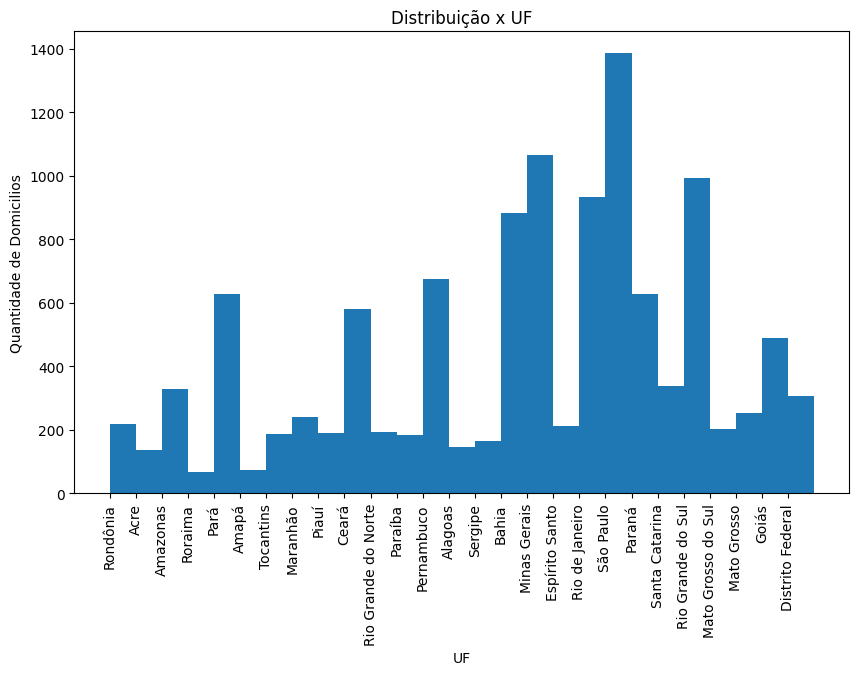

In [14]:
# Resposta 11:

plt.figure(figsize=(10,6))
plt.hist(df['uf'],bins=range(0,28,1))
plt.title('Distribuição x UF')
plt.xlabel('UF')
plt.ylabel('Quantidade de Domicilios')
plt.xticks(rotation=90)
plt.show()

12) Plot um gráfico de barras com a soma total de moradores desta base por UF.

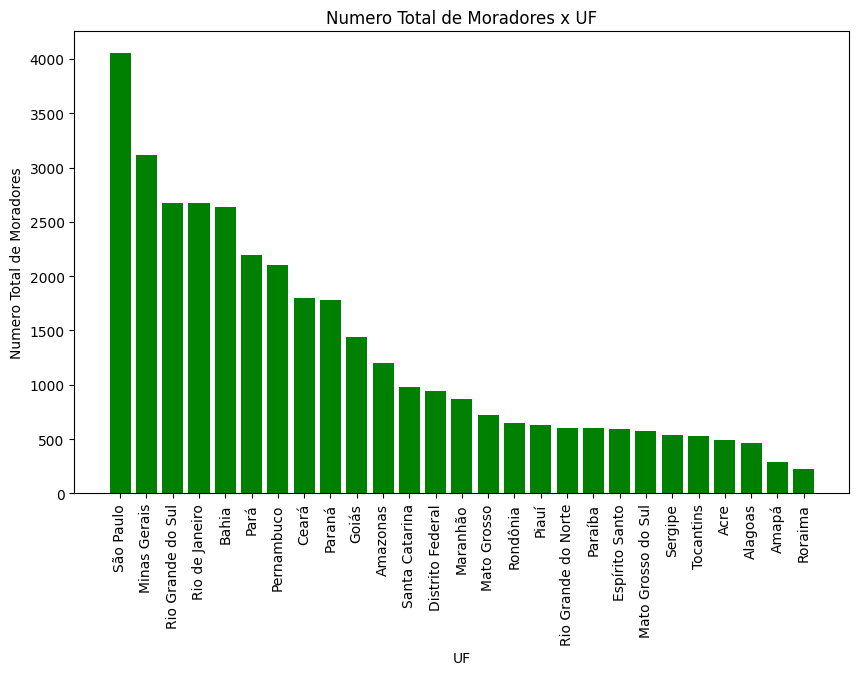

In [15]:
# Resposta 12:

df_2 = df[['uf','num_moradores']].groupby('uf').agg('sum').sort_values('num_moradores', ascending=False)
df_2.reset_index(inplace=True)

plt.figure(figsize=(10,6))
plt.bar(df_2['uf'],df_2['num_moradores'], color='green')
plt.title('Numero Total de Moradores x UF')
plt.xlabel('UF')
plt.ylabel('Numero Total de Moradores')
plt.xticks(rotation=90)
plt.show()

13) Plot um gráfico de dispersão com o número total de moradores (num_moradores) e o número total de dormitorios (num_dormitorios).

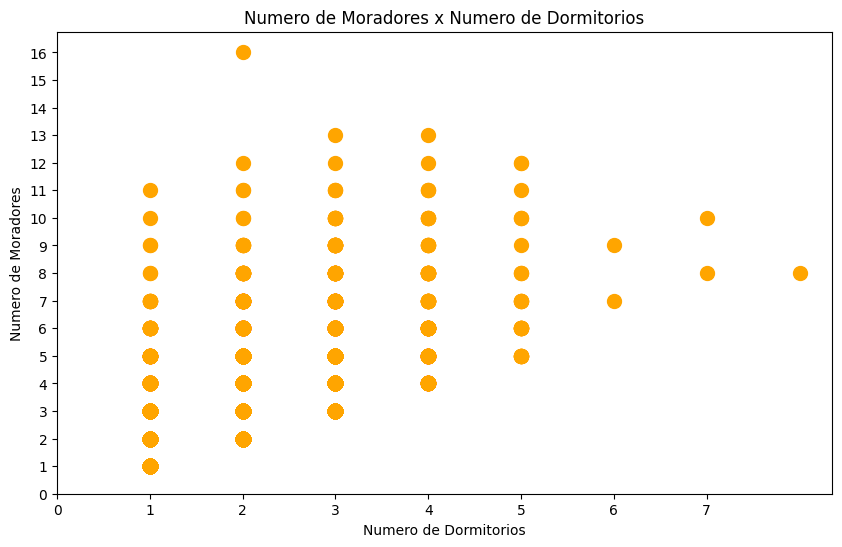

In [16]:
# Resposta 13:

plt.figure(figsize=(10,6))
plt.scatter(df['num_dormitorios'],df['num_moradores'], color='orange', s=100)
plt.title('Numero de Moradores x Numero de Dormitorios')
plt.xlabel('Numero de Dormitorios')
plt.ylabel('Numero de Moradores')
plt.xticks(range(0,8,1))
plt.yticks(range(0,17,1))
plt.show()

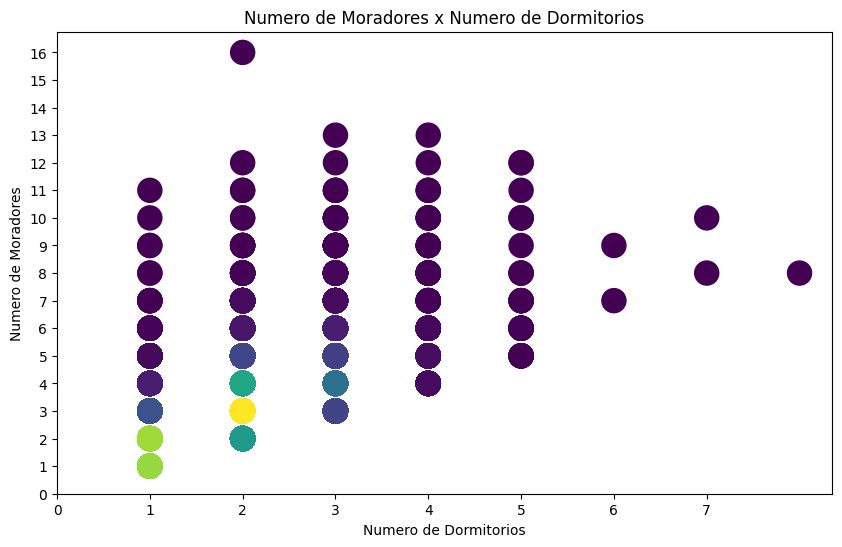

In [17]:
# Alternativa
from scipy.stats import gaussian_kde

x = df['num_dormitorios']
y = df['num_moradores']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

plt.figure(figsize=(10,6))
plt.scatter(x,y, c=z, s=300)
plt.title('Numero de Moradores x Numero de Dormitorios')
plt.xlabel('Numero de Dormitorios')
plt.ylabel('Numero de Moradores')
plt.xticks(range(0,8,1))
plt.yticks(range(0,17,1))
plt.show()

# EXTRA

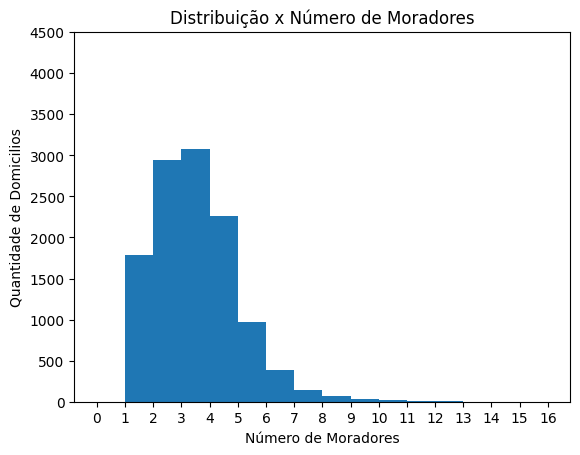

In [18]:

plt.hist(df['num_moradores'], bins=range(0,17,1))
plt.title('Distribuição x Número de Moradores')
plt.xlabel('Número de Moradores')
plt.ylabel('Quantidade de Domicilios')
plt.xticks(range(0,17,1))
plt.yticks(range(0,5000,500))
plt.show()

**Média de número de moradores...**

In [19]:
df['num_moradores'].mean().round(2)

3.02

**Desvio padrão de moradores...**

In [20]:
df['num_moradores'].std().round(2)

1.52